In [3]:
pip install dynamo-release --user

Keyring is skipped due to an exception: 'keyring.backends'
  Using cached dynamo_release-1.2.0-py3-none-any.whl (591 kB)
  Using cached nxviz-0.7.3-py3-none-any.whl (28 kB)
  Using cached colorcet-3.0.1-py2.py3-none-any.whl (1.7 MB)
  Using cached get_version-3.5.4-py3-none-any.whl (18 kB)
  Using cached matplotlib-3.5.3-cp37-cp37m-macosx_10_9_x86_64.whl (7.3 MB)
  Using cached fonttools-4.38.0-py3-none-any.whl (965 kB)
  Using cached numba-0.56.4-cp37-cp37m-macosx_10_14_x86_64.whl (2.4 MB)
  Using cached llvmlite-0.39.1-cp37-cp37m-macosx_10_9_x86_64.whl (25.5 MB)
  Using cached numdifftools-0.9.41-py2.py3-none-any.whl (100 kB)
  Using cached numpy-1.21.6-cp37-cp37m-macosx_10_9_x86_64.whl (16.9 MB)
  Using cached pandas-1.3.5-cp37-cp37m-macosx_10_9_x86_64.whl (11.0 MB)
  Using cached pyct-0.5.0-py2.py3-none-any.whl (15 kB)
  Using cached param-1.13.0-py2.py3-none-any.whl (87 kB)
  Using cached pynndescent-0.5.8-py3-none-any.whl
  Using cached umap_learn-0.5.3-py3-none-any.whl
  Using c

In [1]:
import dynamo as dyn
dyn.configuration.set_figure_params('dynamo', background='white') # jupter notebooks

|-----> setting visualization default mode in dynamo. Your customized matplotlib settings might be overritten.


/Users/cliffzhou/.local/lib/python3.7/site-packages/nxviz/__init__.py:29: UserWarning: 
nxviz has a new API! Version 0.7.3 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.3, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)

  """


In [3]:
data_dir = '../data/emt_sim/'
adata = dyn.read(data_dir+'emt_circuit_larger_noise.h5ad')

In [4]:
dyn.pp.recipe_monocle(adata)
dyn.tl.dynamics(adata)

|-----> recipe_monocle_keep_filtered_cells_key is None. Using default value from DynamoAdataConfig: recipe_monocle_keep_filtered_cells_key=True
|-----> recipe_monocle_keep_filtered_genes_key is None. Using default value from DynamoAdataConfig: recipe_monocle_keep_filtered_genes_key=True
|-----> recipe_monocle_keep_raw_layers_key is None. Using default value from DynamoAdataConfig: recipe_monocle_keep_raw_layers_key=True
|-----> apply Monocole recipe to adata...
|-----> <insert> pp to uns in AnnData Object.
|-----------> <insert> has_splicing to uns['pp'] in AnnData Object.
|-----------> <insert> has_labling to uns['pp'] in AnnData Object.
|-----------> <insert> splicing_labeling to uns['pp'] in AnnData Object.
|-----------> <insert> has_protein to uns['pp'] in AnnData Object.
|-----> ensure all cell and variable names unique.
|-----> ensure all data in different layers in csr sparse matrix format.
|-----> ensure all labeling data properly collapased
|-----------> <insert> tkey to uns['

/Users/cliffzhou/.local/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
estimating gamma: 100%|██████████| 9/9 [00:00<00:00, 179.03it/s]


AnnData object with n_obs × n_vars = 5000 × 9
    obs: 'tgf', 'leiden', 'nGenes', 'nCounts', 'pMito', 'pass_basic_filter', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'Size_Factor', 'initial_cell_size', 'ntr'
    var: 'nCells', 'nCounts', 'pass_basic_filter', 'frac', 'use_for_pca', 'ntr', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'gamma_logLL', 'delta_b', 'delta_r2', 'bs', 'bf', 'uu0', 'ul0', 'su0', 'sl0', 'U0', 'S0', 'total0', 'use_for_dynamics'
    uns: 'leiden', 'leiden_colors', 'neighbors', 'umap', 'pp', 'PCs', 'explained_variance_ratio_', 'pca_mean', 'pca_fit', 'feature_selection', 'dynamics'
    obsm: 'X_umap', 'X_pca', 'X'
    layers: 'spliced', 'unspliced', 'X_unspliced', 'X_spliced', 'M_u', 'M_uu', 'M_s', 'M_us', 'M_ss', 'velocity_S'
    obsp: 'connectivities', 'distances', 'moments_con'

In [5]:
dyn.tl.reduceDimension(adata, basis='umap')

|-----> retrive data for non-linear dimension reduction...
|-----? adata already have basis umap. dimension reduction umap will be skipped! 
set enforce=True to re-performing dimension reduction.
|-----> [dimension_reduction projection] in progress: 100.0000%
|-----> [dimension_reduction projection] finished [0.0021s]


In [7]:
dyn.tl.cell_velocities(adata)
dyn.vf.VectorField(adata,layer = 'spliced',basis='umap')
dyn.vf.topography(adata,basis='umap')

|-----> 0 genes are removed because of nan velocity values.
Using existing pearson_transition_matrix found in .obsp.
|-----> [projecting velocity vector to low dimensional embedding] in progress: 100.0000%
|-----> [projecting velocity vector to low dimensional embedding] finished [1.6225s]
|-----> VectorField reconstruction begins...
|-----> Retrieve X and V based on basis: UMAP. 
        Vector field will be learned in the UMAP space.
|-----> Generating high dimensional grids and convert into a row matrix.
|-----> Learning vector field with method: sparsevfc.
|-----> [SparseVFC] begins...
|-----> Sampling control points based on data velocity magnitude...
|-----> [SparseVFC] in progress: 100.0000%
|-----> [SparseVFC] finished [1.0017s]
|-----> <insert> velocity_umap_SparseVFC to obsm in AnnData Object.
|-----> <insert> X_umap_SparseVFC to obsm in AnnData Object.
|-----> <insert> VecFld_umap to uns in AnnData Object.
|-----> <insert> control_point_umap to obs in AnnData Object.
|----->

/Users/cliffzhou/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/cliffzhou/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


AnnData object with n_obs × n_vars = 5000 × 9
    obs: 'tgf', 'leiden', 'nGenes', 'nCounts', 'pMito', 'pass_basic_filter', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'Size_Factor', 'initial_cell_size', 'ntr', 'control_point', 'inlier_prob', 'obs_vf_angle', 'control_point_umap', 'inlier_prob_umap', 'obs_vf_angle_umap'
    var: 'nCells', 'nCounts', 'pass_basic_filter', 'frac', 'use_for_pca', 'ntr', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'gamma_logLL', 'delta_b', 'delta_r2', 'bs', 'bf', 'uu0', 'ul0', 'su0', 'sl0', 'U0', 'S0', 'total0', 'use_for_dynamics', 'use_for_transition'
    uns: 'leiden', 'leiden_colors', 'neighbors', 'umap', 'pp', 'PCs', 'explained_variance_ratio_', 'pca_mean', 'pca_fit', 'feature_selection', 'dynamics', 'grid_velocity_umap', 'VecFld', 'VecFld_umap'
    obsm: 'X_umap', 'X_pca', 'X', 'velocity_umap', 'velocity_umap_SparseVFC', 'X_umap_SparseVFC'
    layers: 'spliced

|-----> X shape: (5000, 2) V shape: (5000, 2)
|-----------> plotting with basis key=X_umap
|-----------> skip filtering leiden by stack threshold when stacking color because it is not a numeric type


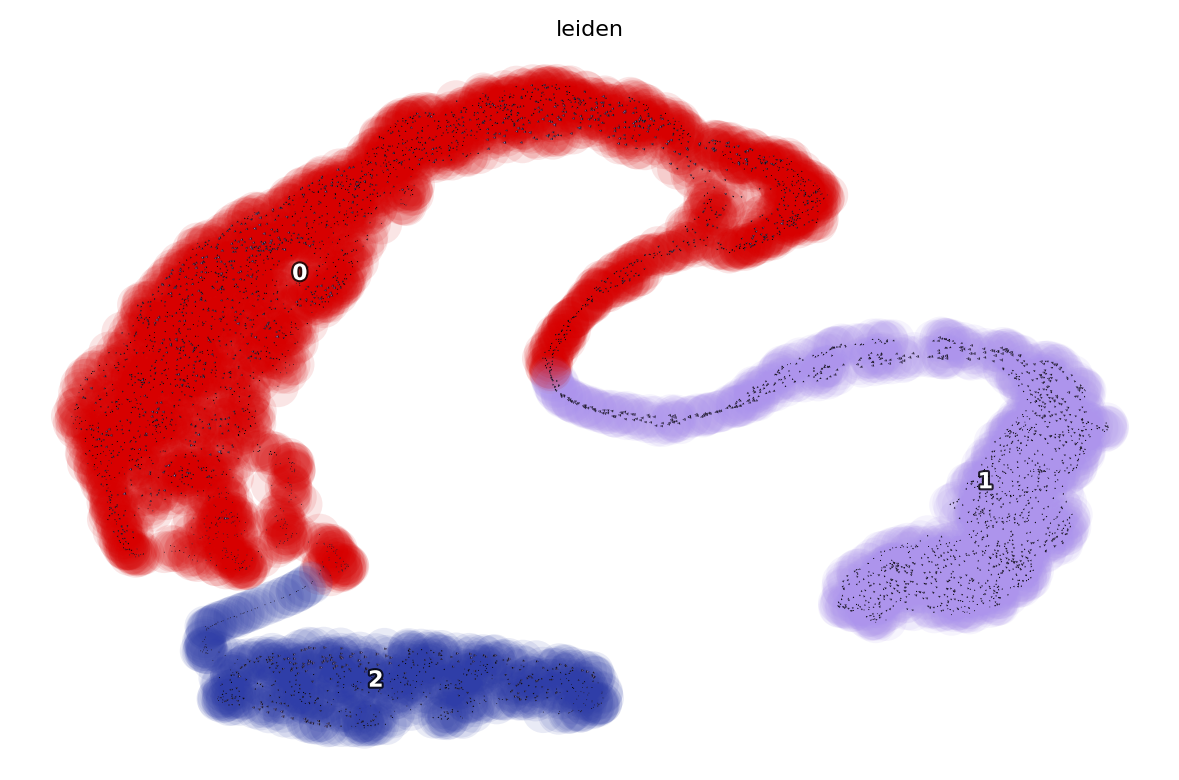

|-----------> plotting with basis key=X_umap
|-----------> skip filtering leiden by stack threshold when stacking color because it is not a numeric type


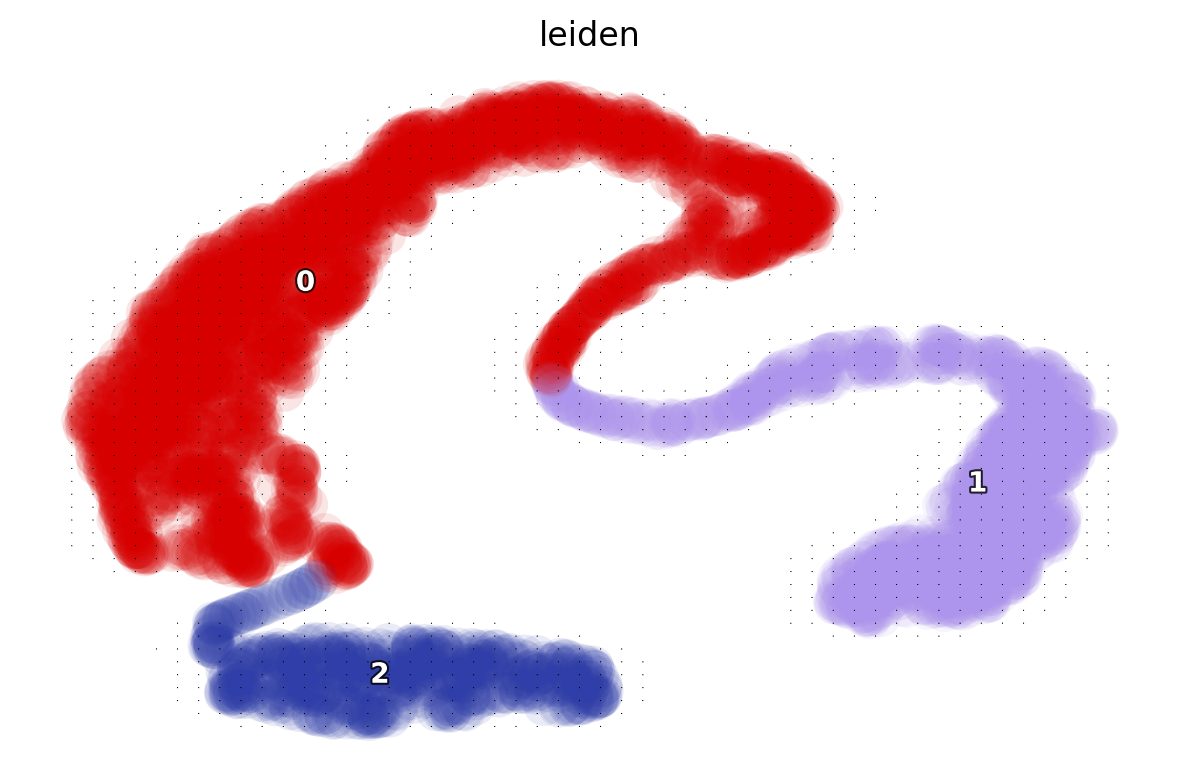

|-----------> plotting with basis key=X_umap
|-----------> skip filtering leiden by stack threshold when stacking color because it is not a numeric type


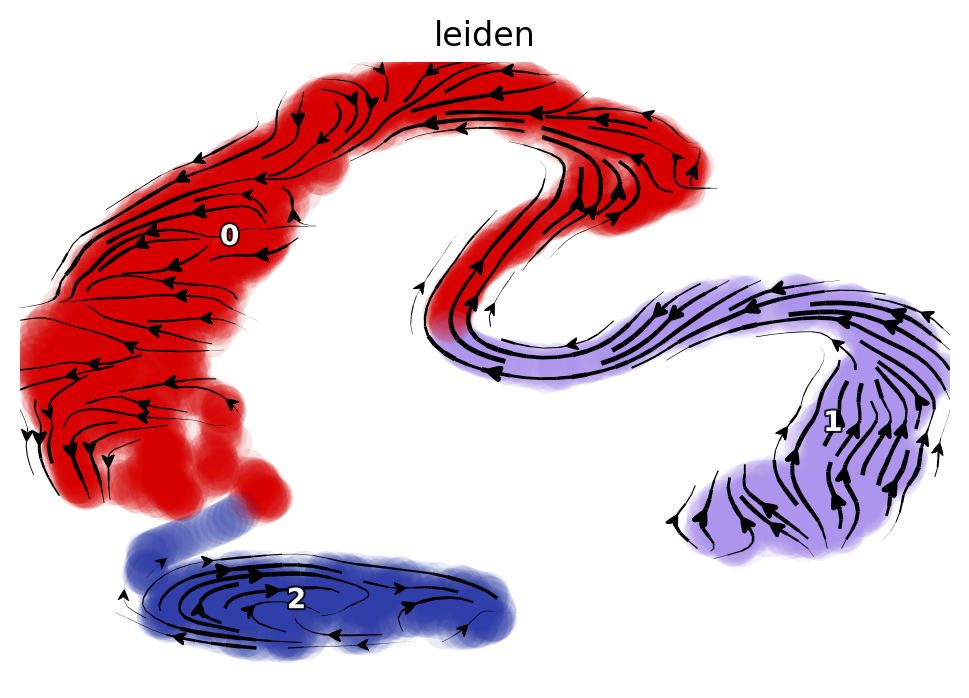

In [8]:
%matplotlib inline
dyn.configuration.set_figure_params('dynamo', background='white') # jupter notebooks
colors = 'leiden'
dyn.pl.cell_wise_vectors(adata, color=colors, ncols=3)
dyn.pl.grid_vectors(adata, color=colors, ncols=3)
dyn.pl.streamline_plot(adata, color=colors, ncols=3)

|-----> VectorField reconstruction begins...
|-----> Retrieve X and V based on basis: UMAP. 
        Vector field will be learned in the UMAP space.
|-----> Generating high dimensional grids and convert into a row matrix.
|-----> Learning vector field with method: sparsevfc.
|-----> [SparseVFC] begins...
|-----> Sampling control points based on data velocity magnitude...
|-----> [SparseVFC] in progress: 100.0000%
|-----> [SparseVFC] finished [0.9850s]
|-----> <insert> velocity_umap_SparseVFC to obsm in AnnData Object.
|-----> <insert> X_umap_SparseVFC to obsm in AnnData Object.
|-----> <insert> VecFld_umap to uns in AnnData Object.
|-----> <insert> control_point_umap to obs in AnnData Object.
|-----> <insert> inlier_prob_umap to obs in AnnData Object.
|-----> <insert> obs_vf_angle_umap to obs in AnnData Object.
|-----> [VectorField] in progress: 100.0000%
|-----> [VectorField] finished [1.3010s]
|-----> Vector field for umap is but its topography is not mapped. Mapping topography now .

/Users/cliffzhou/.local/lib/python3.7/site-packages/dynamo/plot/topography.py:542: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker (<matplotlib.markers.MarkerStyle object at 0x7ff8fa82c590>).  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  zorder=5,
/Users/cliffzhou/.local/lib/python3.7/site-packages/dynamo/plot/topography.py:542: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker (<matplotlib.markers.MarkerStyle object at 0x7ff8dbe69fd0>).  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  zorder=5,
/Users/cliffzhou/.local/lib/python3.7/site-packages/dynamo/plot/topography.py:542: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker (<matplotlib.markers.MarkerStyle object at 0x7ff8e2d5e5d0>).  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change i

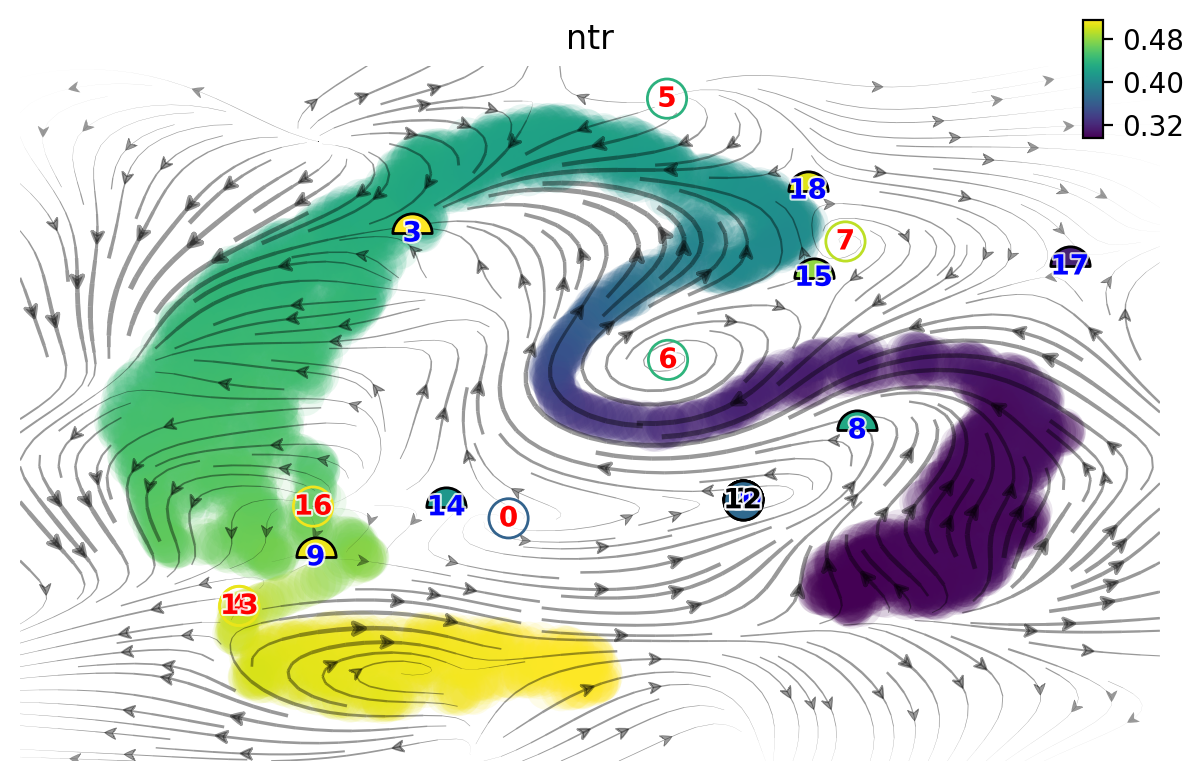

In [9]:
dyn.vf.VectorField(adata, basis='umap')
dyn.pl.topography(adata)